# Hist

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.special import logit, expit
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

In [2]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']

In [4]:
hist_grid = {"learning_rate"   : [0.03,0.04,0.05],
             "max_iter":[200,250,300],
             "max_leaf_nodes":[5,7,9],
#              "l2_regularization":[0.58],
             "scoring":['neg_root_mean_squared_error'],
             'max_depth'        : [2,3,4],
             "min_samples_leaf" :[7,8,9]
             }

In [5]:

rf = HistGradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = hist_grid, n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, estimator=HistGradientBoostingRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.03, 0.04, 0.05],
                                        'max_depth': [2, 3, 4],
                                        'max_iter': [200, 250, 300],
                                        'max_leaf_nodes': [5, 7, 9],
                                        'min_samples_leaf': [7, 8, 9],
                                        'scoring': ['neg_root_mean_squared_error']},
                   random_state=42, verbose=2)

In [6]:
rf_random.best_estimator_

HistGradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_iter=250,
                              max_leaf_nodes=7, min_samples_leaf=9,
                              scoring='neg_root_mean_squared_error')

In [3]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
# y=expit(y)

In [4]:
mod=HistGradientBoostingRegressor(learning_rate=0.06, max_depth=1, max_iter=300,
                              max_leaf_nodes=7, min_samples_leaf=9,
                              scoring='neg_root_mean_squared_error')
# HistGradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_iter=250,
#                               max_leaf_nodes=7, min_samples_leaf=9,
#                               scoring='neg_root_mean_squared_error',l2_regularization=15)
# mod= TransformedTargetRegressor(regressor=modo,func=logit,inverse_func=expit)

In [5]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [17]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])

<Figure size 576x396 with 0 Axes>

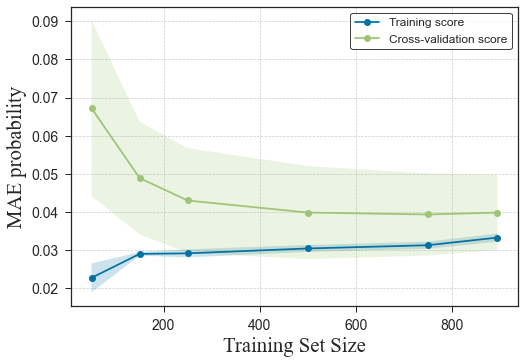

In [18]:
# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
# csfont = {'fontname':'Times New Roman'}    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
# plt.xlabel("Training Set Size",**csfont)
# plt.ylabel("RMS Error",**csfont)
# plt.legend(loc="best")
# plt.show()

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE probability", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('ribrisk_LC', bbox_inches="tight")
plt.show()

In [19]:
pd.DataFrame(test_mean)

,0
0,0.067174
1,0.048891
2,0.043020
3,0.039856
4,0.039349
5,0.039857


In [6]:
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)

In [7]:
X = X.to_numpy()
y = y.to_numpy()


In [8]:
y_Test=y_Test.to_numpy()

In [9]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()



Root Mean squared error: 1.512292

Root Mean squared error: 1.342233

Root Mean squared error: 1.584051

Root Mean squared error: 2.580689

Root Mean squared error: 1.546336

Root Mean squared error: 2.188565

Root Mean squared error: 1.977112

Root Mean squared error: 2.325537

Root Mean squared error: 1.893210

Root Mean squared error: 2.578179



In [10]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  2.806118837218802 | 
|error mean |  0.04214668313358972| 
|error std  |  0.11826860146745807|
___________________________________


# train score

In [11]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  3.0709471330483007 | 
|error mean |  0.03360603416077799| 
|error std  |  0.10320235425916442|
___________________________________


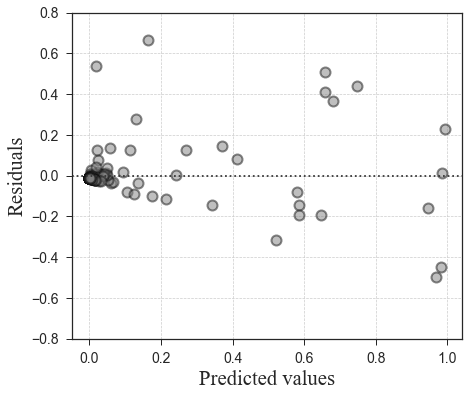

In [14]:
plt.figure(figsize=(7, 6))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
# a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='Test',scatter_kws={"s": 100,"facecolor": 'grey',"linewidth":2,"edgecolors": 'k',"alpha":0.5})
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

# leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
# leg.get_frame().set_linewidth(1)
# leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([15,80])
plt.ylim([-0.8,0.8])
plt.savefig('riskxg_res', bbox_inches="tight")
plt.show()

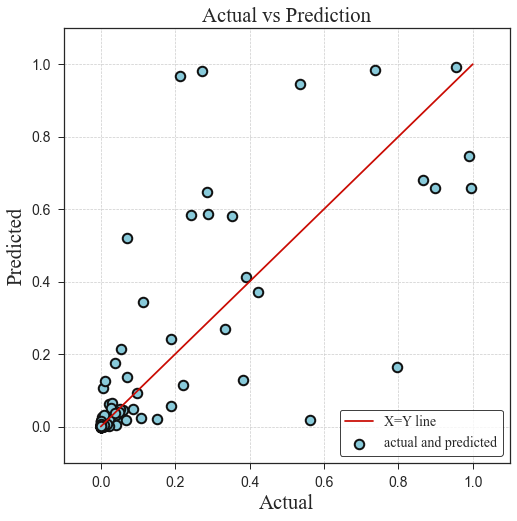

In [23]:

plt.figure(figsize=(8, 8))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.scatter(y_Test,ytestunk, marker = 'o', linewidths = 2, edgecolors = 'k',s=90,facecolors='C5',label='actual and predicted')
plt.plot([0,1],[0,1],color='r',label='X=Y line')
plt.grid(False)
plt.title('Actual vs Prediction', fontsize='xx-large',**csfont)
plt.xlabel('Actual', fontsize='xx-large',**csfont)
plt.ylabel('Predicted', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
# plt.savefig('dmax_grad', bbox_inches="tight")
plt.show()


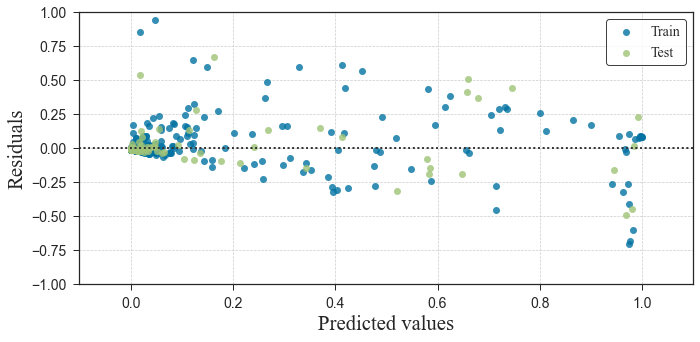

In [42]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='Test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([-0.1,1.1])
plt.ylim([-1,1])
plt.savefig('riskxg_res', bbox_inches="tight")
plt.show()

In [11]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,796.000000
mean,0.006591
std,0.108342
min,-0.788994
25%,-0.000316
50%,-0.000002
75%,0.000851
max,0.951647


In [12]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.008790
std,0.125280
min,-0.755021
25%,-0.001795
50%,-0.000007
75%,0.000162
max,0.632900


In [63]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('histunseen.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('histtrain.csv')

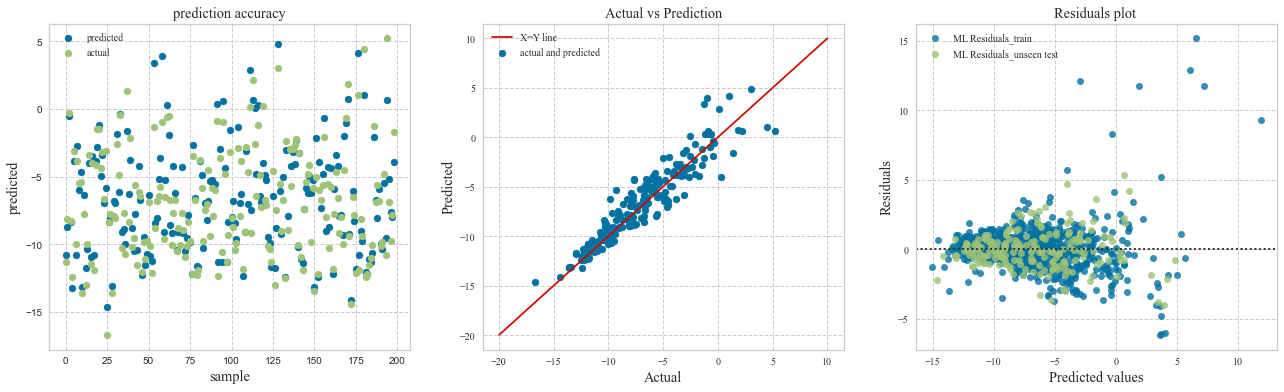

In [11]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# XG

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor

In [27]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']

In [78]:
param_tuning = {
        'learning_rate': [0.04,0.05],
        'max_depth': [4,5],
        'min_child_weight': [15,16,17],
        'subsample': [0.55],
         'gamma'  : [0.05,0.075],
        'colsample_bytree': [0.75,0.8],
        'n_estimators' : [50,70,90]}

In [80]:

rf = xg.XGBRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_tuning, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 144 is smaller than n_iter=400. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.7min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_meth

In [81]:
rf_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.05, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=15, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.55,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
modo=xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.05, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.035, max_delta_step=0, max_depth=3,
             min_child_weight=15, monotone_constraints='()',
             n_estimators=250, n_jobs=12, num_parallel_tree=1, random_state=5,
             reg_alpha=0, reg_lambda=10, scale_pos_weight=1, subsample=0.55,
             tree_method='exact', validate_parameters=1, verbosity=None)
mod = TransformedTargetRegressor(regressor=modo,func=logit,inverse_func=expit)

In [29]:
cv = KFold(n_splits=10, random_state=1)

In [31]:
y_actual = []
predict = []
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
y=expit(y)
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])


<Figure size 576x396 with 0 Axes>

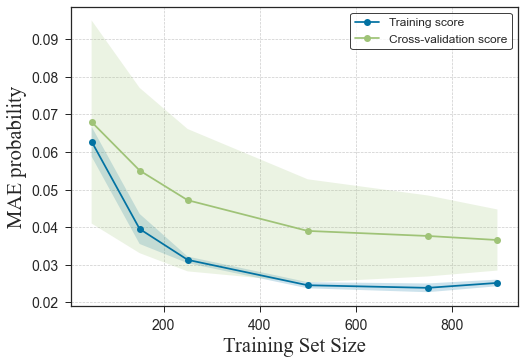

In [32]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE probability", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('rskXGLC', bbox_inches="tight")
plt.show()
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

In [33]:
pd.DataFrame(test_mean)

,0
0,0.067998
1,0.055096
2,0.047198
3,0.039028
4,0.037685
5,0.036607


In [18]:
X = X.to_numpy()
y = y.to_numpy()

In [19]:
y_Test=y_Test.to_numpy()

In [20]:
kf=cv
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

# ytestunk=HBM_Train.predict(X_Test)
# err=np.zeros(len(ytestunk))
# for u in range (0,len(ytestunk)):
#     err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
# a=pd.DataFrame(err).describe()
# cov_r=a.loc['std']/abs(a.loc['mean'])
# print('___________________________________')
# print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
# print('___________________________________')

Root Mean squared error: 1.344060

Root Mean squared error: 1.236733

Root Mean squared error: 1.577350

Root Mean squared error: 2.069355

Root Mean squared error: 1.405547

Root Mean squared error: 2.296968

Root Mean squared error: 2.048994

Root Mean squared error: 2.154071

Root Mean squared error: 1.754172

Root Mean squared error: 2.567849



In [21]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  2.9860663448657907 | 
|error mean |  0.04531477535837434| 
|error std  |  0.13531292562279526|
___________________________________


# train score

In [22]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print('___________________________________')
print('|error COV  |  {0} | \n|error mean |  {1}| \n|error std  |  {2}|'.format(cov_r[0],abs(a.loc['mean'][0]),a.loc['std'][0]))
print('___________________________________')

___________________________________
|error COV  |  3.195564444640265 | 
|error mean |  0.026386415688224286| 
|error std  |  0.08431949179478762|
___________________________________


In [23]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,7.960000e+02
mean,-4.733705e-04
std,8.835537e-02
min,-6.347401e-01
25%,-1.833869e-04
50%,-7.321089e-07
75%,6.247295e-04
max,8.982164e-01


In [24]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.016738
std,0.141746
min,-0.714294
25%,-0.001739
50%,-0.000003
75%,0.000045
max,0.771082


In [25]:
# df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
# df_tosave['test actual']=pd.DataFrame(y_Test)
# df_tosave.to_csv('Xunseen.csv')

# df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
# df_trn['actual']=pd.DataFrame(y)
# df_trn.to_csv('Xtrain.csv')

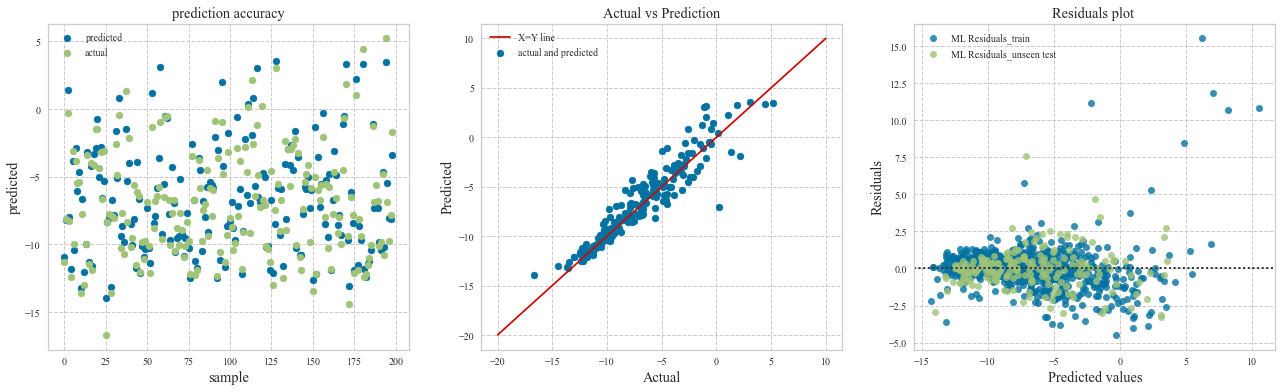

In [22]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train')
r=sns.residplot(y=(y_Test), x=(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()